In [1]:
import scanpy as scp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime

from auxiliar import *
from scmap import *

# Parameters

In [2]:
# dataset_name = "full"
# dataset_name = "wildtype"
dataset_name = "T_mutant"
# dataset_name = "Eomes_mutant"

# parameters_file = "parameters_full.csv"
parameters_file = "parameters_by_condition.csv"

In [3]:
dataset_reference = "pijuan"

parameters = pd.read_csv(parameters_file, index_col=0).loc[dataset_name, :].to_dict()
print("Parameters: ")
parameters

Parameters: 


{'n_top_genes': 2000,
 'n_top_genes.1': 2000,
 'n_pcs': 30,
 'n_neighbors': 15,
 'cell_cycle_regression': True,
 'resolutions': '[0.1,0.2,0.5,1]'}

# Annotate by stage and project comparatively

In [4]:
if False:
    adata_reference = scp.read("data_other_studies/pijuan/adata_curated.h5ad")

    for i in [
        "data_other_studies/susanne/adata_curated.h5ad",
        "data_other_studies/prisca/adata_curated.h5ad",
    ]:

        adata = scp.read(i)
        adata.var_names = adata.var["gene_ids"]
        adata_reference.var_names = adata_reference.var["gene_ids"]

        scmap_annotate(adata, adata_reference, "stage", algorithm_flavor="cell", knn=5, key_layer="counts_log1p", similarity_threshold=.5, key_added="annotation_stage")
        scmap_annotate(adata, adata_reference, "annotation", algorithm_flavor="cell", knn=5, key_layer="counts_log1p", similarity_threshold=.5, key_added="annotation_cell_type")
        adata.write_h5ad(i)

In [6]:
if True:

    adata_reference = scp.read(f"data_other_studies/{dataset_reference}/adata_curated.h5ad")

    for name in [
        "wildtype",
        "T_mutant",
        "Eomes_mutant",
    ]:

        file_name = f"data_processed/adata_{name}.h5ad"

        adata = scp.read(f"data_processed/adata_{name}.h5ad")
        adata.layers["counts_log1p"] = np.log1p(adata.layers["counts"])
        adata.var["gene_ids"] = adata.var["gene_id"]
        adata.var_names = adata.var["gene_ids"]
        adata_reference.var_names = adata_reference.var["gene_ids"]

        scmap_annotate(adata, adata_reference, "stage", algorithm_flavor="cell", knn=5, key_layer="counts_log1p", similarity_threshold=.5, key_added="annotation_stage")
        scmap_annotate(adata, adata_reference, "annotation", algorithm_flavor="cell", knn=5, key_layer="counts_log1p", similarity_threshold=.5, key_added="annotation_cell_type")
        adata.write_h5ad(f"data_processed/adata_{name}.h5ad")

        

/Users/gatocor/miniforge3/envs/scrnaseq_vitamin_a/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/gatocor/miniforge3/envs/scrnaseq_vitamin_a/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/gatocor/miniforge3/envs/scrnaseq_vitamin_a/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/gatocor/miniforge3/envs/scrnaseq_vitamin_a/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/gatocor/m

In [8]:
obs_total = []
for name,file in [
    ("wildtype",f"data_processed/adata_wildtype.h5ad"),
    ("T_mutant",f"data_processed/adata_T_mutant.h5ad"),
    ("Eomes_mutant",f"data_processed/adata_Eomes_mutant.h5ad"),
    ("susanne","data_other_studies/susanne/adata_curated.h5ad"),
    ("prisca","data_other_studies/prisca/adata_curated.h5ad"),
]:

    adata = scp.read(file)
    obs = pd.DataFrame()
    obs["annotation_stage"] = adata.obs["annotation_stage"]
    obs["annotation_cell_type"] = adata.obs["annotation_cell_type"]
    obs["dataset"] = name
    if "timepoints" in adata.obs.columns:
        obs["timepoints"] = adata.obs["timepoints"]
    else:
        obs["timepoints"] = ""
    obs_total.append(obs)
obs_total = pd.concat(obs_total, axis=0)

/Users/gatocor/miniforge3/envs/scrnaseq_vitamin_a/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/gatocor/miniforge3/envs/scrnaseq_vitamin_a/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/gatocor/miniforge3/envs/scrnaseq_vitamin_a/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
obs_total["annotation_stage_num"] = obs_total["annotation_stage"].apply(lambda x: float(x.split("E")[-1]) if "E" in x else np.nan)
obs_total["dataset_timepoints"] = obs_total.apply(lambda x: x["dataset"] + "_" + x["timepoints"] if x["timepoints"] != "" else x["dataset"], axis=1)

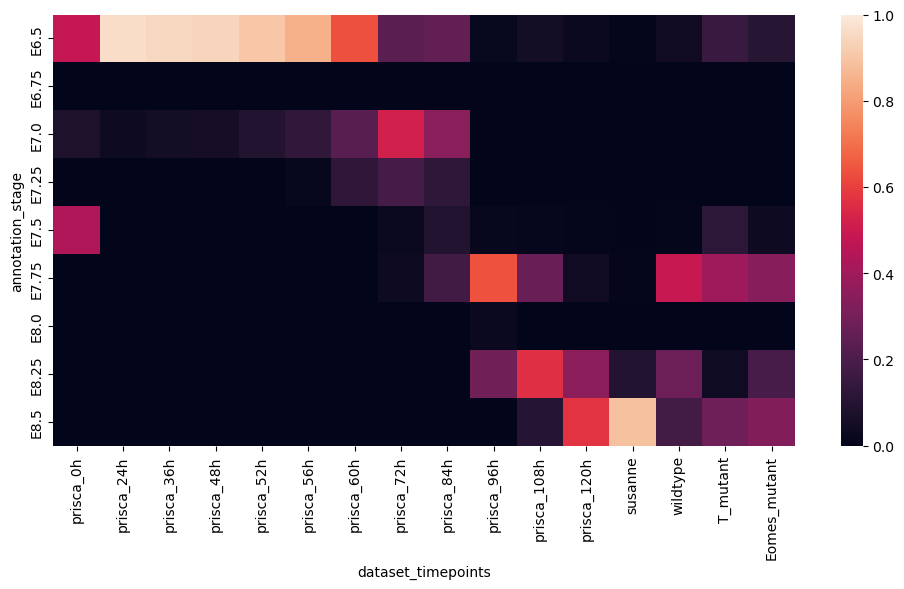

In [10]:
order = ["prisca_0h", "prisca_24h", "prisca_36h", "prisca_48h", "prisca_52h", "prisca_56h", "prisca_60h", "prisca_72h", "prisca_84h", "prisca_96h", "prisca_108h", "prisca_120h", "susanne", "wildtype", "T_mutant", "Eomes_mutant"]
order_rows=["E6.5","E6.75","E7.0","E7.25","E7.5","E7.75","E8.0","E8.25","E8.5"]

table = obs_total.groupby(["annotation_stage","dataset_timepoints"]).count().iloc[:,0].unstack()
table = table.loc[order_rows,order].fillna(0)
table = table.div(table.sum(axis=0), axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(table, vmax=1, ax=ax)
fig.tight_layout()
fig.savefig(f"figures/full/scmap_annotation_time_comparative_{dataset_reference}.png", bbox_inches="tight")

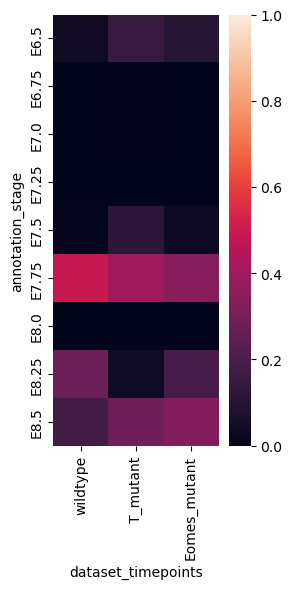

In [11]:
order = ["wildtype", "T_mutant", "Eomes_mutant"]
order_rows=["E6.5","E6.75","E7.0","E7.25","E7.5","E7.75","E8.0","E8.25","E8.5"]

table = obs_total.groupby(["annotation_stage","dataset_timepoints"]).count().iloc[:,0].unstack()
table = table.loc[order_rows,order].fillna(0)
table = table.div(table.sum(axis=0), axis=1)

fig, ax = plt.subplots(figsize=(3, 6))
sns.heatmap(table, vmax=1, ax=ax)
fig.tight_layout()
fig.savefig(f"figures/full/scmap_annotation_time_comparative_{dataset_reference}_our_dataset.png", bbox_inches="tight")

# Annotate by stage

/Users/gatocor/miniforge3/envs/scrnaseq_vitamin_a/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_94410/306855466.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = obs.groupby(["annotation_stage",resolution]).count().iloc[:,0].unstack()
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_94410/306855466.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = obs.groupby(["annotation_

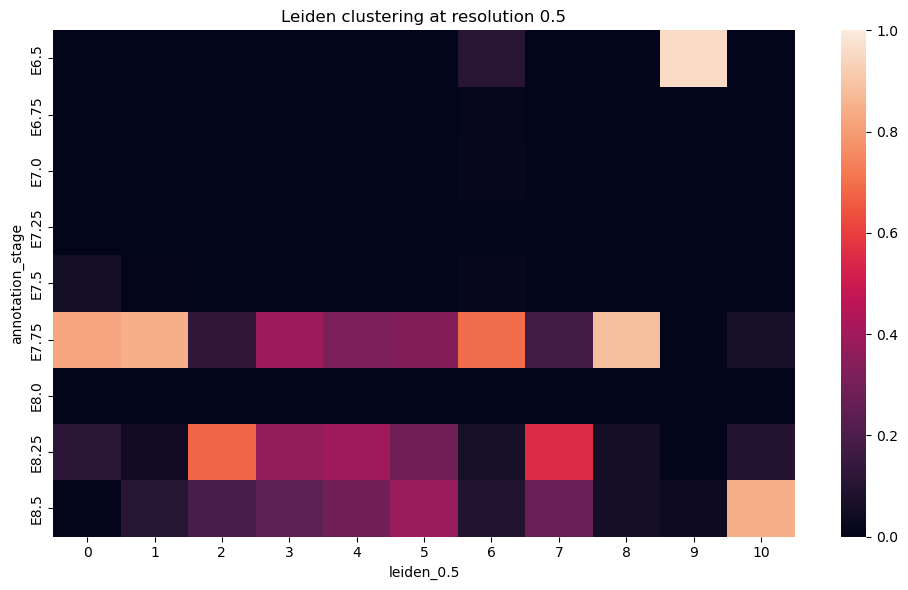

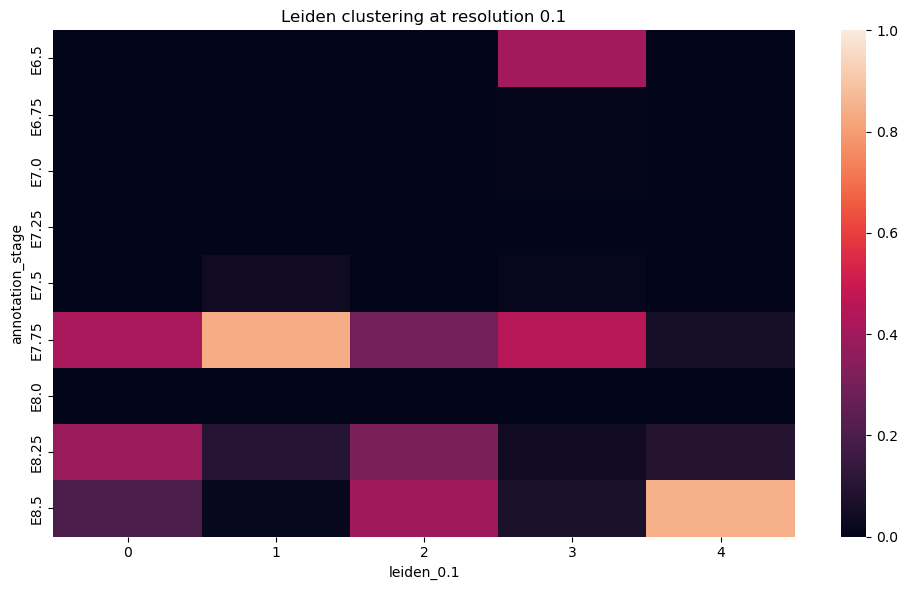

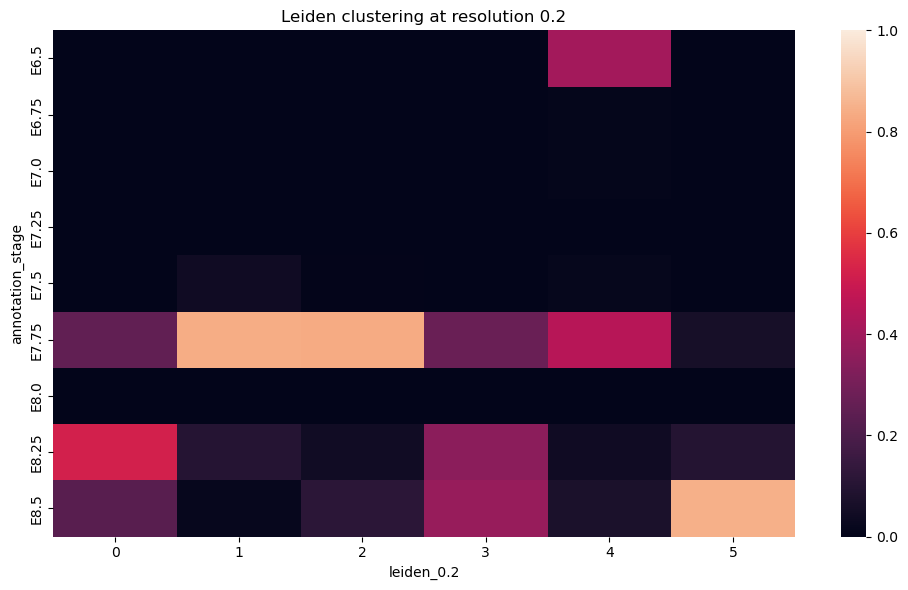

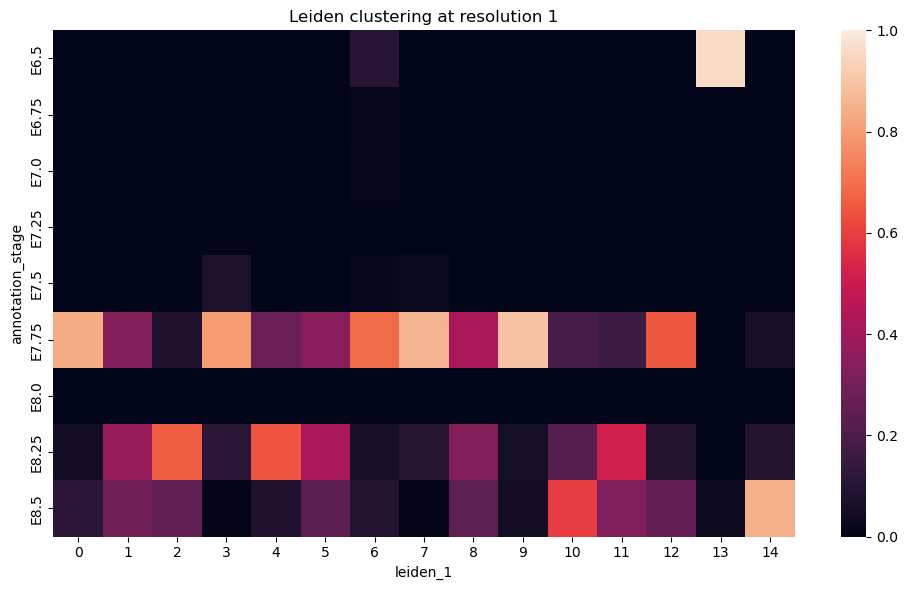

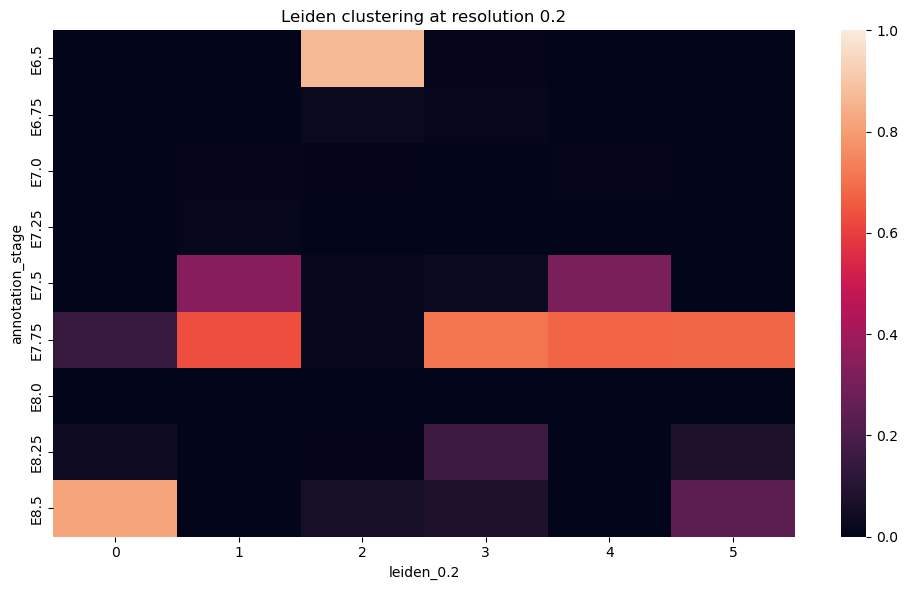

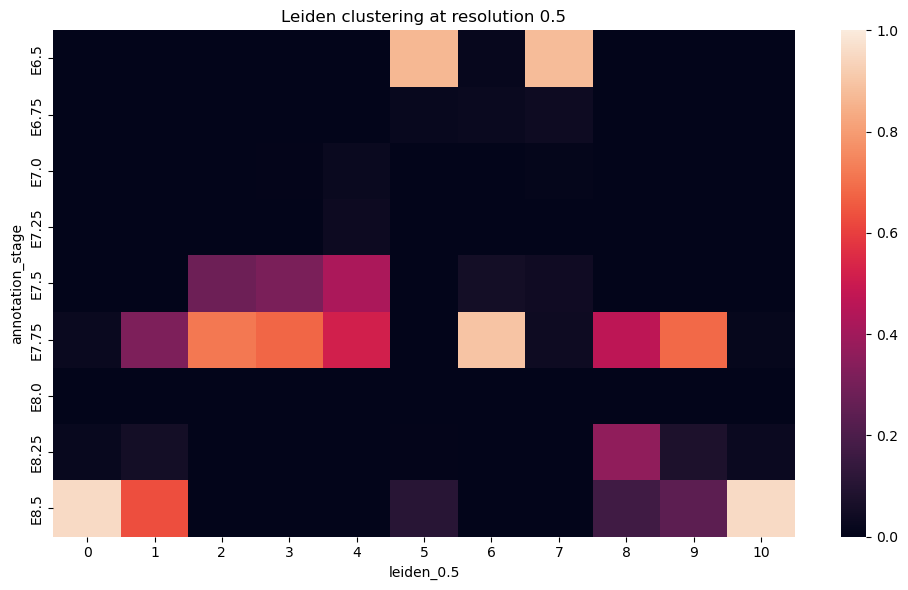

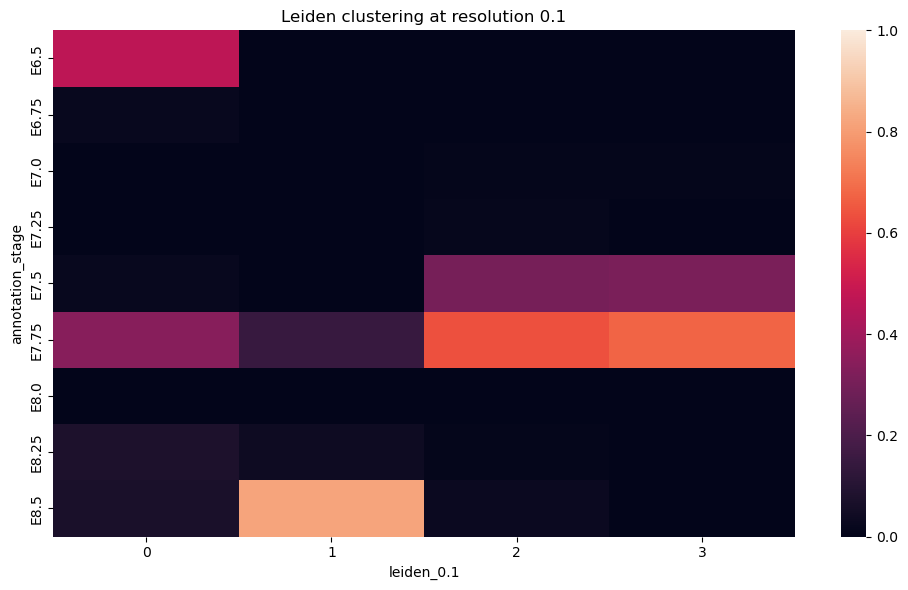

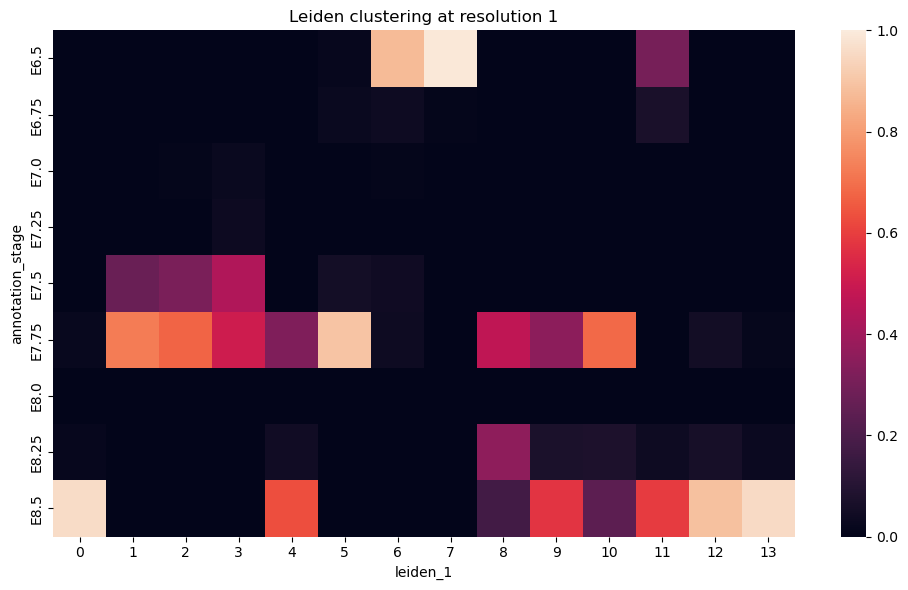

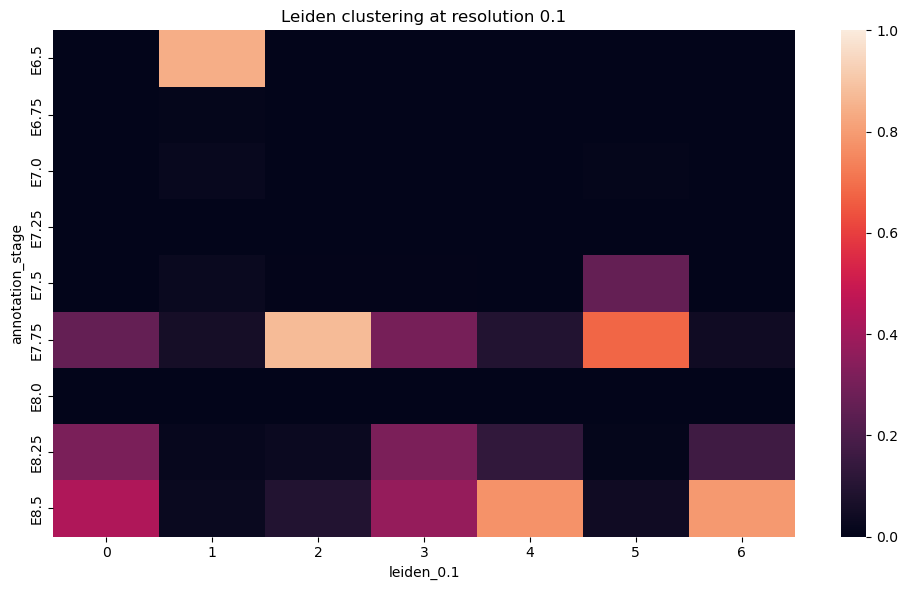

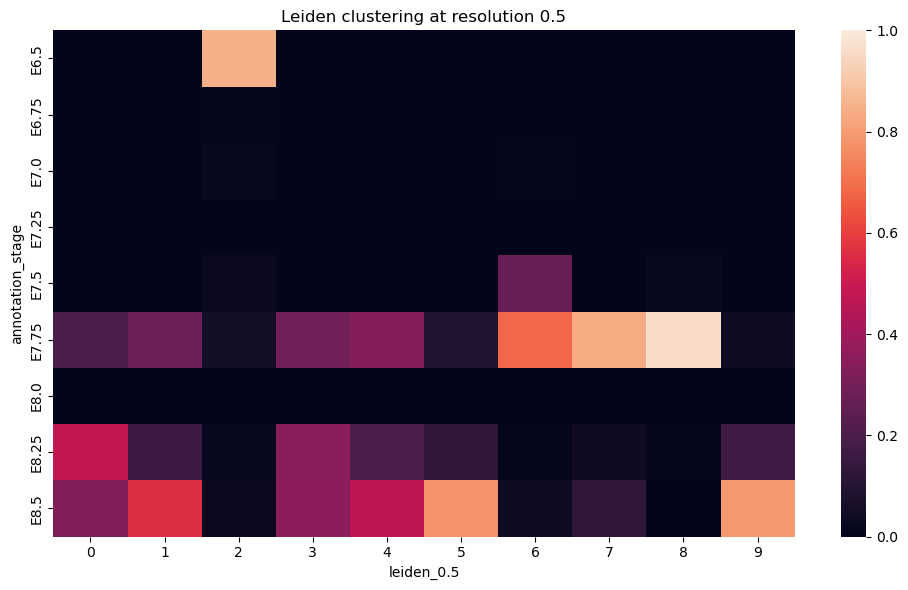

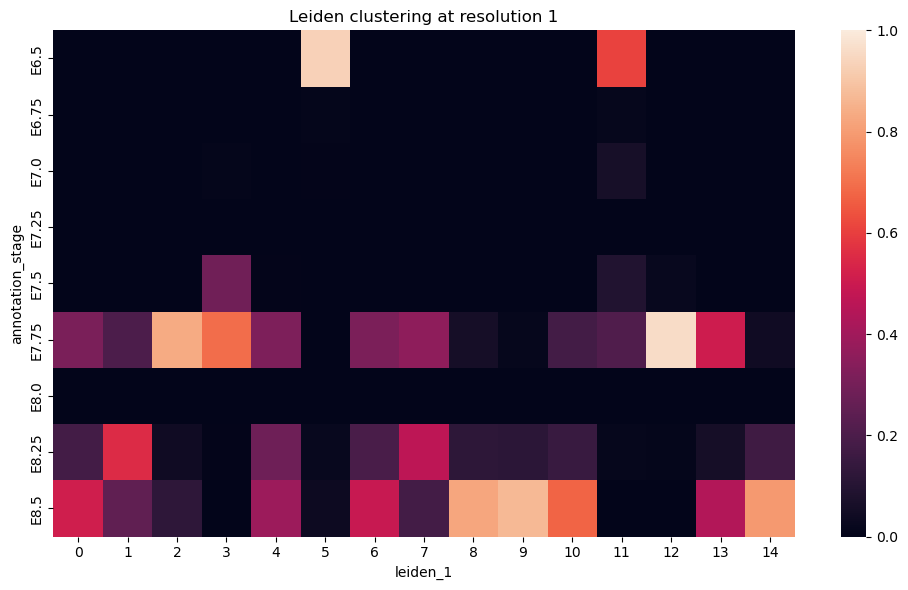

In [13]:
for dataset_name in [
    "wildtype",
    "T_mutant",
    "Eomes_mutant",
]:

    file_name = f"data_processed/adata_{dataset_name}.h5ad"

    adata = scp.read_h5ad(f"{file_name}")
    obs = adata.obs

    for resolution in [i for i in obs.columns if "leiden" in i]:
        order_rows=["E6.5","E6.75","E7.0","E7.25","E7.5","E7.75","E8.0","E8.25","E8.5"]

        table = obs.groupby(["annotation_stage",resolution]).count().iloc[:,0].unstack()
        for i in order_rows:
            if i not in table.index:
                table.loc[i,:] = 0
        table = table.loc[order_rows,:].fillna(0)
        table = table.div(table.sum(axis=0), axis=1)

        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(table, vmax=1, ax=ax)
        ax.set_title(f"Leiden clustering at resolution {resolution.split('_')[-1]}")
        fig.tight_layout()
        fig.savefig(f"figures/{dataset_name}/scmap_annotation_time_{dataset_reference}_leiden_{resolution}.png")

## Save analysis script

In [15]:
# Get the current date
current_date = datetime.now().strftime("%Y%m%d")

# Construct the output file name with the current date
input_file = f"analysis_projection_time.ipynb"
output_file = f"script_versions/analysis_projection_time_{current_date}"

# Convert the notebook to HTML with the new file name
!jupyter nbconvert --to html "$input_file" --output "$output_file"

[NbConvertApp] Converting notebook analysis_projection_time.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 799025 bytes to script_versions/analysis_projection_time_20250610.html
